# Theory

Let $X$, $Y$ be two random variables, and $X = g(Y)$. 

Let the CDFs (cumulative distribution functions) be

\begin{align*}
F_X(x) 
&= P(X \le x) \\
&= P(g(Y) \le x) \\
&= P(Y \le g^{-1}(x)) \\
&= F_Y\left(g^{-1}(x)\right)
\end{align*}

Take derivative on both sides to get the PDFs (probability density functions),

\begin{align*}
\frac{\partial F_X(x)}{\partial x} 
&= \frac{\partial F_Y \left(g^{-1}(x) \right)}{\partial x} \\
&= \frac{\partial F_Y}{\partial g^{-1}(x)} \frac{\partial g^{-1}(x)}{\partial x} \\
p_X(x) &= p_Y(y) \frac{dy}{dx} \\
p_Y(y)
&= p_X(x) \frac{dx}{dy} \\
&= p_X\left(g(y) \right) \frac{dx}{dy} \\
\end{align*}

To adjust for $y = g^{-1}(x)$ with decreasing monotonicity, we take absolute value of the derivative. Therefore,

\begin{align*}
p_Y(y) 
&= p_X(x) \left| \frac{dx}{dy} \right| \\
&= p_X\left(g(y)\right) \left| \frac{dx}{dy} \right|
\end{align*}

# Experiment

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Linear transformation

In [2]:
def g_func(y):
    """x = g(y)."""
    return - 4 * y

In [3]:
def g_func_inv(x):
    """y = g^{-1}(x).
    
    Inverse of g_func.
    
    Returns:
        a value between (0, 1).
    """
    return - 1 / 4 * x

In [4]:
def pdf_x(x):
    """Probability density function of X, a standard Gaussian."""
    return 1 / np.sqrt(2 * np.pi) * np.exp(- 0.5 * x ** 2)

In [5]:
def abs_dx_dy_ratio(y):
    return 4

In [6]:
def pdf_y(y):
    """Probability density function of Y."""
    x = g_func(y)
    return pdf_x(x) * abs_dx_dy_ratio(y)

In [7]:
sample_x = np.sort(np.random.normal(size=100000))
sample_y = g_func_inv(sample_x)

Text(0, 0.5, 'Density')

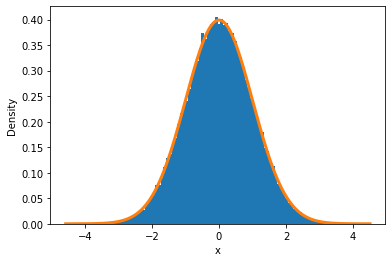

In [8]:
_ = plt.hist(sample_x, bins=np.linspace(-4, 4, 100), density=True)
plt.plot(sample_x, pdf_x(sample_x), lw=3)
plt.xlabel('x')
plt.ylabel('Density')

In [9]:
bins_y = np.linspace(-4, 4, 100)

In [10]:
norm = np.sum(pdf_x(g_func(bins_y)))

Text(0, 0.5, 'Density')

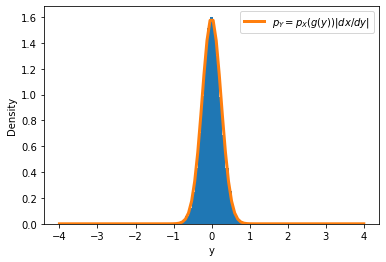

In [11]:
_ = plt.hist(sample_y, bins=bins_y, density=True)
plt.plot(bins_y, pdf_y(bins_y), lw=3, label='$p_Y = p_X (g(y)) | dx/dy|$')
plt.legend()
plt.xlabel('y')
plt.ylabel('Density')

As seen, $p_X(g(y))$ won't integrate to 1 as $y \in (0, 1)$, and $p_x(g(y))$ won't cover the whole $x$ axis, as shown below.

In [12]:
ys = np.linspace(0, 1, 100)

Text(0.5, 1.0, '$x = g^{-1}(y)$')

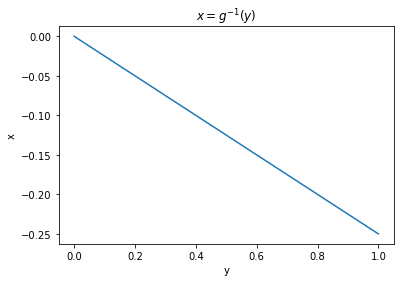

In [13]:
plt.plot(ys, g_func_inv(ys))
plt.xlabel('y')
plt.ylabel('x')
plt.title('$x = g^{-1}(y)$')

Also note, as $g^{-1}(x)$ is monotonically decreasing, so the absolute value around $\left|\frac{dx}{dy}\right|$ is required.

# Non-linear transformation

We sample $x$ from a standard Gaussian, 

\begin{align*}
p_X(x) &= \frac{1}{\sqrt{2 \pi}} \exp \left(-\frac{1}{2} x^2 \right) \\
\end{align*}

Then apply a sigmoid function to $x$ to sample $y$,

\begin{align*}
y &= g^{-1}(x) = \frac{1}{1 + \exp(-x + 2)} \\
\end{align*}

from which, we also get

\begin{align*}
x &= g(y) = \ln y - \ln(1 - y) + 2 \\
\frac{dx}{dy} &= \frac{1}{y} + \frac{1}{1 - y} = \frac{1}{y(1 - y)} \\
\end{align*}


In [14]:
def g_func(y):
    """x = g(y)."""
    return - np.log(y) + np.log(1 - y) - 2

In [15]:
def g_func_inv(x):
    """y = g^{-1}(x).
    
    Inverse of g_func.
    
    Returns:
        a value between (0, 1).
    """
    return 1 / (1 + np.exp(x + 2))

In [16]:
def pdf_x(x):
    """Probability density function of X, a standard Gaussian."""
    return 1 / np.sqrt(2 * np.pi) * np.exp(- 0.5 * x ** 2)

In [17]:
def abs_dx_dy_ratio(y):
    return np.abs(- 1 / (y * (1 - y)))

In [18]:
def pdf_y(y):
    """Probability density function of Y."""
    x = g_func(y)
    return pdf_x(x) * abs_dx_dy_ratio(y)

In [19]:
sample_x = np.sort(np.random.normal(size=100000))
sample_y = g_func_inv(sample_x)

Text(0, 0.5, 'Density')

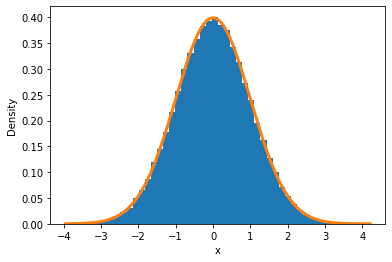

In [20]:
_ = plt.hist(sample_x, bins=50, density=True)
plt.plot(sample_x, pdf_x(sample_x), lw=3)
plt.xlabel('x')
plt.ylabel('Density')

In [21]:
bins_y = np.linspace(0.001, 0.999, 100)

In [22]:
norm = np.sum(pdf_x(g_func(bins_y)))

Text(0, 0.5, 'Density')

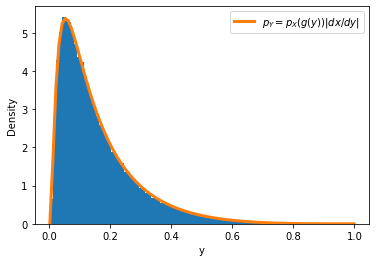

In [23]:
_ = plt.hist(sample_y, bins=bins_y, density=True)
plt.plot(bins_y, pdf_y(bins_y), lw=3, label='$p_Y = p_X (g(y)) | dx/dy|$')
plt.legend()
plt.xlabel('y')
plt.ylabel('Density')

As seen, $p_X(g(y))$ won't integrate to 1 as $y \in (0, 1)$, and $p_x(g(y))$ won't cover the whole $x$ axis, as shown below.

In [24]:
ys = np.linspace(0, 1, 100)

Text(0.5, 1.0, '$x = g^{-1}(y)$')

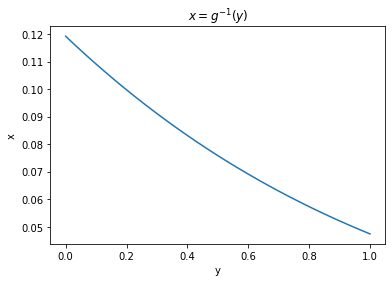

In [25]:
plt.plot(ys, g_func_inv(ys))
plt.xlabel('y')
plt.ylabel('x')
plt.title('$x = g^{-1}(y)$')

Also note, as $g^{-1}(x)$ is monotonically decreasing, so the absolute value around $\left|\frac{dx}{dy}\right|$ is required.